# Experiment 6: Image Segmentation

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 1. Thresholding

### 1.1 Basic Global Thresholding

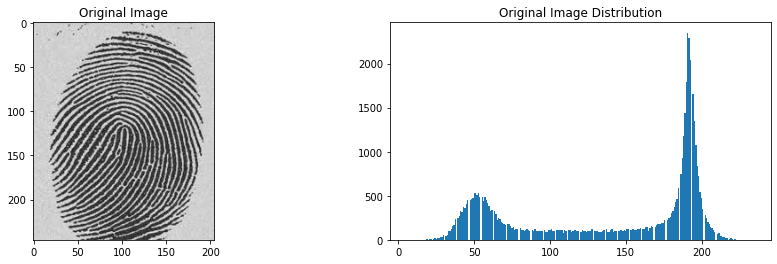

In [2]:
image = cv2.imread('Images/fingerprint.jpg', cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.hist(image.ravel(), bins=256)
ax2.title.set_text('Original Image Distribution')

In [3]:
# Computing T Values until difference in T is smaller than T0
T = (np.max(image) + np.min(image)) // 2 # Initial Estimate of T
T0 = 0

while(True):
    print(T)
    u1 = [x for x in image.ravel() if x > T ]
    u2 = [x for x in image.ravel() if x <= T ]
    T_new = ((sum(u1)/len(u1)) + (sum(u2)/len(u2))) // 2
    if abs(T_new - T) <=  T0:
        break
    else:
        T = T_new

120
123.0
124.0


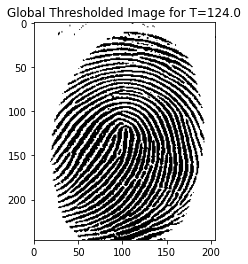

In [4]:
global_thres = image > T
plt.imshow(global_thres, cmap='gray')
plt.title(f'Global Thresholded Image for T={T}')
plt.show()

### 1.2 Basic Adaptive Thresholding

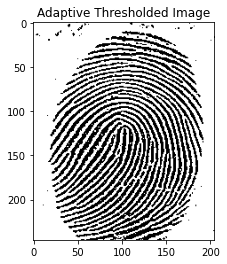

In [5]:
# Taking Threshold Value as the Mean in the Neighbourhood Area
#adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
adaptive_thres = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 15)

plt.imshow(adaptive_thres, cmap='gray')
plt.title(f'Adaptive Thresholded Image')
plt.show()

## 2. Edge Detection

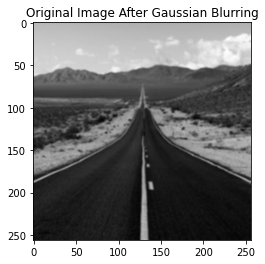

In [6]:
image = cv2.imread('Images/road.bmp', cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (3,3), 0)
plt.imshow(image, cmap='gray')
plt.title('Original Image After Gaussian Blurring')
plt.show()

### 2.1 Sobel Edge Detection

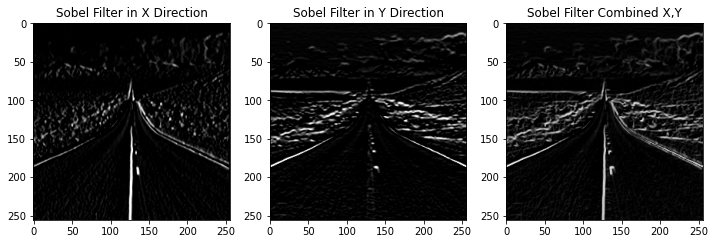

In [7]:
sobelX = cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=3).astype(np.uint64)  
sobelY = cv2.Sobel(image, cv2.CV_8U, 0, 1, ksize=3).astype(np.uint64)
sobel = np.sqrt(np.power(sobelX, 2) + np.power(sobelY, 2)).astype(np.uint64)

fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(sobelX, cmap='gray')
ax1.title.set_text('Sobel Filter in X Direction')
ax2.imshow(sobelY, cmap='gray')
ax2.title.set_text('Sobel Filter in Y Direction')
ax3.imshow(sobel, cmap='gray')
ax3.title.set_text('Sobel Filter Combined X,Y')

### 2.2 Laplacian Edge Detection

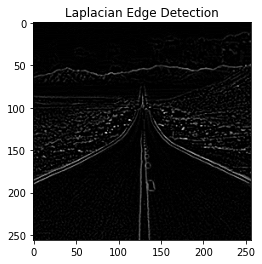

In [8]:
laplacian = cv2.Laplacian(image, cv2.CV_8U)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()

### 2.3 Canny Edge Detection

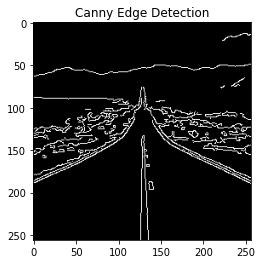

In [9]:
THRESHOLD1 = 100
THRESHOLD2 = 200

edges = cv2.Canny(image, THRESHOLD1, THRESHOLD2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

### 2.4 Marr Hildreth Edge Detection

## Isolated Point Detection

In [10]:
# Using Point Detection Mask on Image
image = cv2.imread('Images/turbine.jpg', cv2.IMREAD_GRAYSCALE)
point_detection_mask = np.array([[-1,-1,-1], 
                                 [-1,8,-1], 
                                 [-1,-1,-1]])
filtered = cv2.filter2D(image, -1, point_detection_mask)

In [11]:
# Thresholding
T = 0.9 * np.max(filtered) # 90% of the highest absolute pixel value of the image filtered
thresh = filtered > T

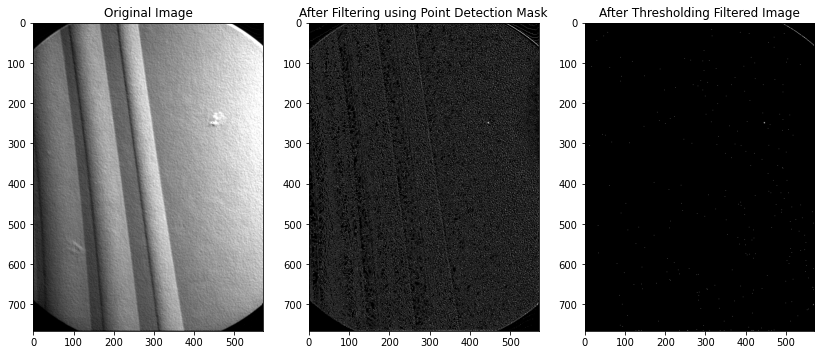

In [12]:
# Displaying Results
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(filtered, cmap='gray')
ax2.title.set_text('After Filtering using Point Detection Mask')
ax3.imshow(thresh, cmap='gray')
ax3.title.set_text('After Thresholding Filtered Image')